<a href="https://colab.research.google.com/github/tilopez/GO_distance/blob/master/4_go_multiple_parents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toolboxes y funciones

In [0]:
!pip install pygsp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
np.set_printoptions(suppress=True)

     |████████████████████████████████| 1.8MB 5.0MB/s 


In [0]:
def exp_matrix( dist, exp ):
  dist = dist.round(8)
  rta = np.zeros(exp.shape)
  [n,m] = exp.shape

  for i in range(n):
    fila_dist = np.concatenate((dist[i,0:i],dist[i,i+1:n]))
    comps = np.zeros(m)
    cont = 0
    for j in range(n-2):
      for k in range(j+1,n-1):
        comps[cont] = 0 if fila_dist[j] < fila_dist[k] else 1 if fila_dist[j] == fila_dist[k] else 2
        cont = cont + 1
    rta[i,:] = comps

  eva = []
  genes = []
  cant = 0

  for i in range(n):
    word = []
    for j in range(m):
      if rta[i,j] == exp[i,j]:
        word.append("right")
      else:      
        word.append("WRONG")
        cant += 1
        
        # determinar los genes que dieron el error
        cont = 0
        for k in range(n-1):
          for l in range(k,n):
            if k != i and l != i and k != l:
              if cont == j:
                genes.append([i+1, k+1, l+1])
              cont += 1

    eva.append(word)

  print("Nro de errores: ", cant)

  return(eva,genes)

# Grafo y genes

In [0]:
ini = np.array([0, 1, 1, 2, 3, 4, 4, 5, 5, 6, 7,  9,  10])
fin = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])

N = fin.max()+1
A = np.zeros((N,N))

for i, f in zip(ini, fin):
    A[i,f] = 1
A = A + A.T

print(A)

# Matriz de grado
d = np.sum(A,1)
D = np.diag(d)

# Laplaciano
L = D - A

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


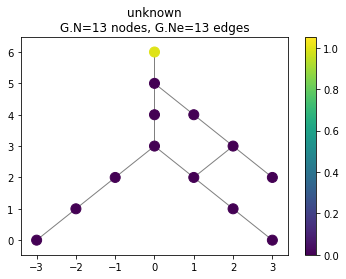

In [0]:
G = graphs.Graph(A)

coords = [[0, 6], [0, 5], [0, 4], [1, 4], [0, 3], [2, 3], [-1, 2], [1, 2], [3, 2], [-2, 1], [2, 1], [-3, 0], [3, 0]]
G.set_coordinates(coords)

G.plot_signal(np.concatenate(([1],[0]*12)))

In [0]:
def labgene(labs,N):
  g = np.zeros(N)
  for i in labs:
    g[i] = 1
  return g

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.]


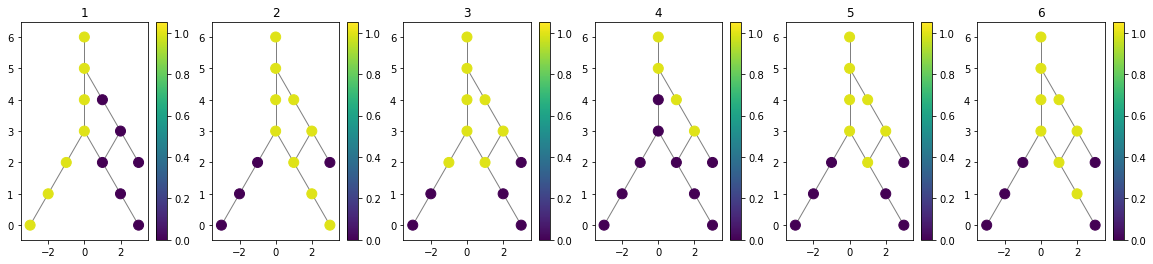

In [0]:
genes = []
genes.append(labgene([0,1,2,4,6,9,11],N))
genes.append(labgene([0,1,2,3,4,5,7,10,12],N))
genes.append(labgene([0,1,2,3,4,5,6,7],N))
genes.append(labgene([0,1,3,5],N))
genes.append(labgene([0,1,2,3,4,5,7],N))
genes.append(labgene([0,1,2,3,4,5,7,10],N))

#agregar mas genes ^^^

for i in genes:
  print(i)

n = len(genes)
strgen = "gen "

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, n, figsize=(20,4))

for i in range(n):
    ax1 = plt.subplot(1, n, i+1)
    G.plot_signal(genes[i], ax=ax1, plot_name=strgen.join(str(i+1)))

# Bases propias (laplaciano y QR también)

## Un vector por hoja / Caminos unidos

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


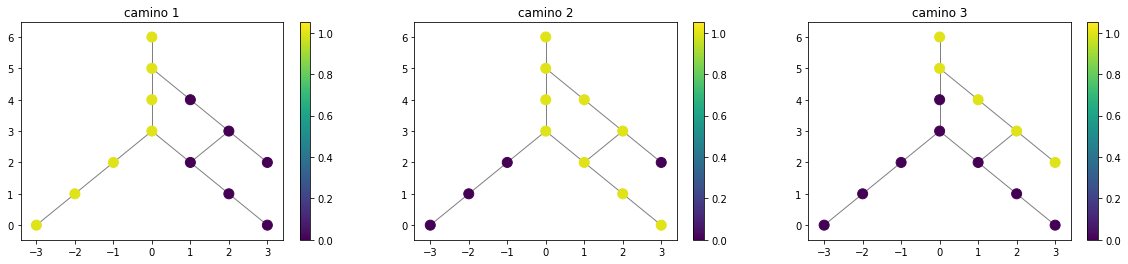

In [0]:
b1_camino1 = labgene([0,1,2,4,6,9,11],N)
b1_camino2 = labgene([0,1,2,3,4,5,7,10,12],N)
b1_camino3 = labgene([0,1,3,5,8],N)

print(b1_camino1)
print(b1_camino2)
print(b1_camino3)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 3, figsize=(20,4))

ax1 = plt.subplot(1, 3, 1);     G.plot_signal(b1_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 3, 2);     G.plot_signal(b1_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 3, 3);     G.plot_signal(b1_camino3, ax=ax1, plot_name="camino 3")

In [0]:
B1 = np.column_stack((b1_camino1, b1_camino2, b1_camino3)).T
print(B1)

d1=np.sum(B1.T,axis=0)
idx1=np.argsort(d1)
B1=B1[idx1,:]
print(B1)

n1 = np.linalg.norm(B1, axis=1, ord=1)
#B1 = B1/n1[:,None]
print(B1)

[[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]


## Un vector por camino / Caminos separados

[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


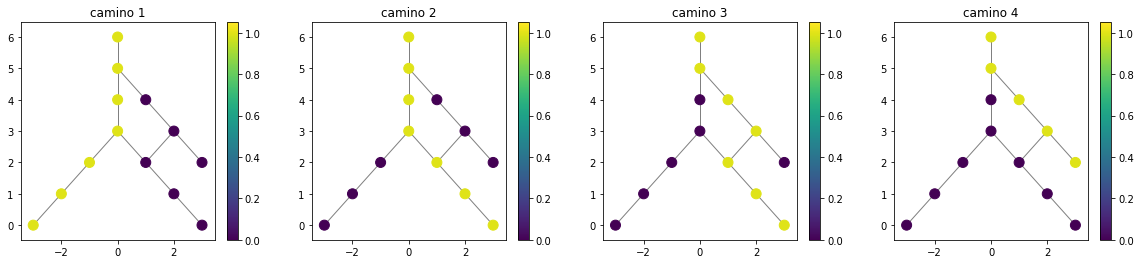

In [0]:
b2_camino1 = labgene([0,1,2,4,6,9,11],N)
b2_camino2 = labgene([0,1,2,4,7,10,12],N)
b2_camino3 = labgene([0,1,3,5,7,10,12],N)
b2_camino4 = labgene([0,1,3,5,8],N)

print(b2_camino1)
print(b2_camino2)
print(b2_camino3)
print(b2_camino4)

plotting.BACKEND = 'matplotlib'
fig, ax = plt.subplots(1, 4, figsize=(20,4))

ax1 = plt.subplot(1, 4, 1);     G.plot_signal(b2_camino1, ax=ax1, plot_name="camino 1")
ax1 = plt.subplot(1, 4, 2);     G.plot_signal(b2_camino2, ax=ax1, plot_name="camino 2")
ax1 = plt.subplot(1, 4, 3);     G.plot_signal(b2_camino3, ax=ax1, plot_name="camino 3")
ax1 = plt.subplot(1, 4, 4);     G.plot_signal(b2_camino4, ax=ax1, plot_name="camino 4")

In [0]:
B2 = np.column_stack((b2_camino1, b2_camino2, b2_camino3, b2_camino4)).T
print(B2)

d2=np.sum(B2.T,axis=0)
idx2=np.argsort(d2)
B2=B2[idx2,:]
print(B2)

n2 = np.linalg.norm(B2, axis=1, ord=1)
#B2 = B2/n2[:,None]
print(B2)

[[1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]]
[[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.]]


## Base del laplaciano

In [0]:
autoval, autovec = np.linalg.eigh(L)
idx = autoval.argsort();
autoval = autoval[idx]
BL = autovec[:,idx]

## Bases de factorización QR

In [0]:
q,r = np.linalg.qr(B1.T,mode='complete')
q1=q
q1[:,:3]=B1.T
BQR1=q1.T

In [0]:
q,r = np.linalg.qr(B2.T,mode='complete')
q2=q
q2[:,:4]=B2.T
BQR2=q2.T

## Comparar bases

In [0]:
print(B1.T)
print(B2.T)
#print(BL.T)
#print(BQR1.T)
#print(BQR2.T)

[[1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 1.]]


# Pruebas

### Distancias bases propias

In [0]:
dist_B1 = np.zeros((n,n))
dist_B2 = np.zeros((n,n))
genes = np.column_stack(genes).T

ggf1 = np.dot(B1, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B1[i,j] = np.linalg.norm(ggf1[i,:]-ggf1[j,:])

ggf2 = np.dot(B2, genes.T).T
for i in range(n):
  for j in range(i,n):
    dist_B2[i,j] = np.linalg.norm(ggf2[i,:]-ggf2[j,:])

dist_B1 = dist_B1 + dist_B1.T
dist_B2 = dist_B2 + dist_B2.T

print(dist_B1)
print(dist_B2)

[[0.         6.164414   4.12310563 5.38516481 4.69041576 5.38516481]
 [6.164414   0.         2.23606798 5.38516481 2.         1.        ]
 [4.12310563 2.23606798 0.         4.24264069 1.         1.41421356]
 [5.38516481 5.38516481 4.24264069 0.         3.60555128 4.47213595]
 [4.69041576 2.         1.         3.60555128 0.         1.        ]
 [5.38516481 1.         1.41421356 4.47213595 1.         0.        ]]
[[0.         6.8556546  4.24264069 6.08276253 4.79583152 5.74456265]
 [6.8556546  0.         3.         6.164414   2.82842712 1.41421356]
 [4.24264069 3.         0.         4.35889894 1.         1.73205081]
 [6.08276253 6.164414   4.35889894 0.         3.74165739 4.89897949]
 [4.79583152 2.82842712 1.         3.74165739 0.         1.41421356]
 [5.74456265 1.41421356 1.73205081 4.89897949 1.41421356 0.        ]]



 Caminos unidos
          1         2         3         4         5         6
1  0.000000  6.164414  4.123106  5.385165  4.690416  5.385165
2  6.164414  0.000000  2.236068  5.385165  2.000000  1.000000
3  4.123106  2.236068  0.000000  4.242641  1.000000  1.414214
4  5.385165  5.385165  4.242641  0.000000  3.605551  4.472136
5  4.690416  2.000000  1.000000  3.605551  0.000000  1.000000
6  5.385165  1.000000  1.414214  4.472136  1.000000  0.000000

 Caminos separados
          1         2         3         4         5         6
1  0.000000  6.855655  4.242641  6.082763  4.795832  5.744563
2  6.855655  0.000000  3.000000  6.164414  2.828427  1.414214
3  4.242641  3.000000  0.000000  4.358899  1.000000  1.732051
4  6.082763  6.164414  4.358899  0.000000  3.741657  4.898979
5  4.795832  2.828427  1.000000  3.741657  0.000000  1.414214
6  5.744563  1.414214  1.732051  4.898979  1.414214  0.000000


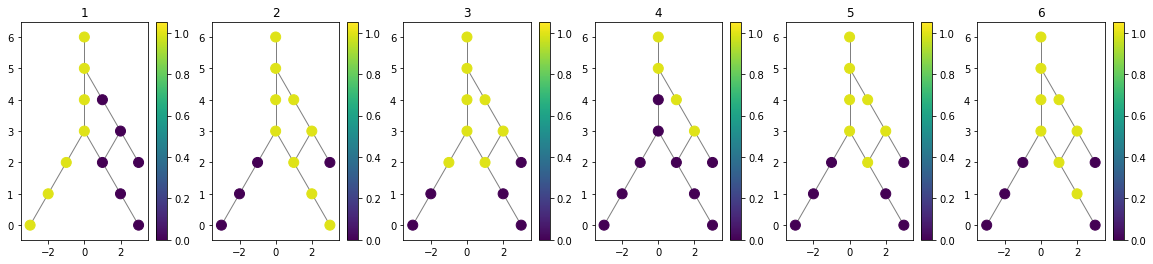

In [0]:
noms = []
for i in range(n):
  noms.append(strgen.join(str(i+1)))

print("\n Caminos unidos")
frame1 = pd.DataFrame(dist_B1, noms, noms)
print(frame1) 

print("\n Caminos separados")
frame2 = pd.DataFrame(dist_B2, noms, noms)
print(frame2) 

fig, ax = plt.subplots(1, n, figsize=(20,4))
for i in range(n):
    ax1 = plt.subplot(1, n, i+1);
    G.plot_signal(genes[i], ax=ax1, plot_name=noms[i])

### Llenar la matriz de valores esperados

In [0]:
# para graficar los genes que se van a comparar
def plot_comparacion( id_genes ):
  
  for i in range(len(id_genes)):
    id_genes[i] = id_genes[i] - 1

  fig, ax = plt.subplots(1, 3, figsize=(20,4))
  for i in range(3):
    ax1 = plt.subplot(1, 3, i+1);
    G.plot_signal(genes[id_genes[i]], ax=ax1, plot_name=noms[id_genes[i]])

In [0]:
# matriz de datos esperados
n = 6
m = 0
for i in range(2,n):
  m = m + n - i

exp = np.zeros((n,m))

#### Comparaciones con el gen 1

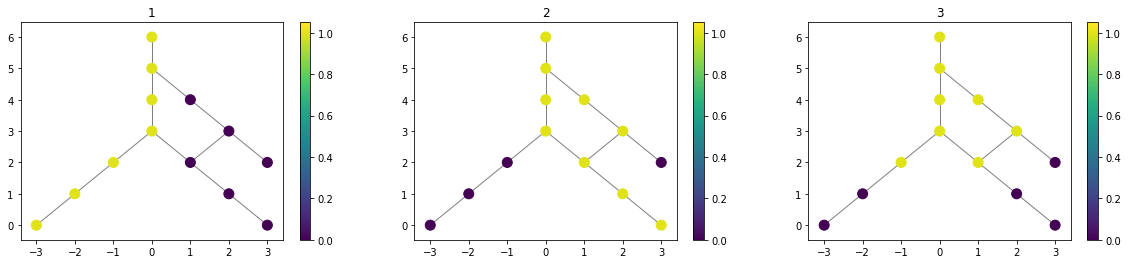

In [0]:
exp[0,0]=2 # 1,2,3
exp[0,1]=0 # 1,2,4
exp[0,2]=2 # 1,2,5
exp[0,3]=2 # 1,2,6
exp[0,4]=0 # 1,3,4
exp[0,5]=0 # 1,3,5
exp[0,6]=0 # 1,3,6
exp[0,7]=2 # 1,4,5
exp[0,8]=2 # 1,4,6
exp[0,9]=0 # 1,5,6

plot_comparacion([1,2,3])

#### Comparaciones con el gen 2

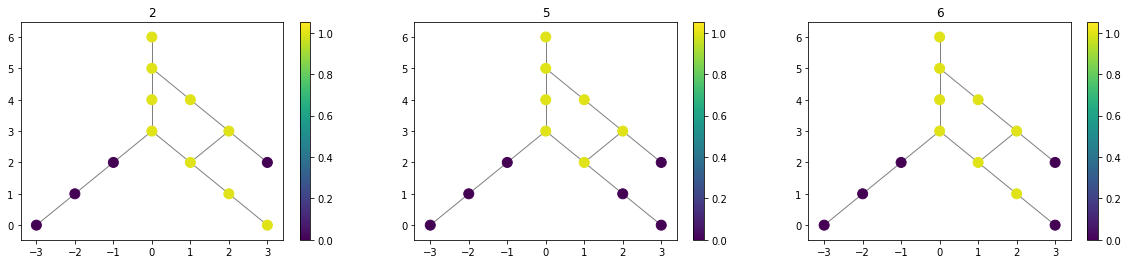

In [0]:
exp[1,0]=2 # 2,1,3
exp[1,1]=2 # 2,1,4
exp[1,2]=2 # 2,1,5
exp[1,3]=2 # 2,1,6
exp[1,4]=0 # 2,3,4
exp[1,5]=2 # 2,3,5
exp[1,6]=2 # 2,3,6
exp[1,7]=2 # 2,4,5
exp[1,8]=2 # 2,4,6
exp[1,9]=2 # 2,5,6

plot_comparacion([2,5,6])

#### Comparaciones con el gen 3

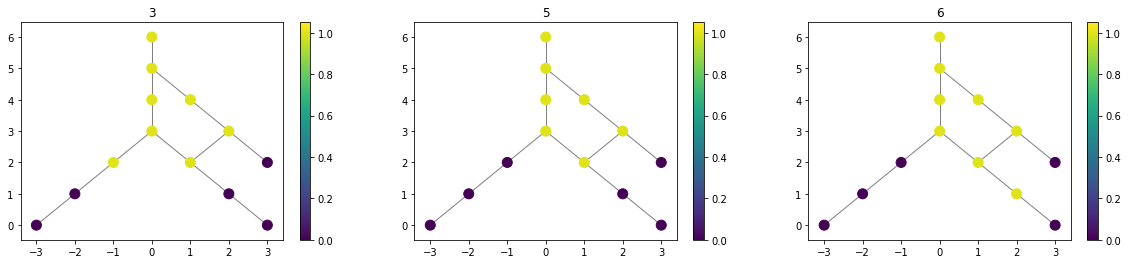

In [0]:
exp[2,0]=2 # 3,1,2
exp[2,1]=0 # 3,1,4
exp[2,2]=2 # 3,1,5
exp[2,3]=2 # 3,1,6
exp[2,4]=0 # 3,2,4
exp[2,5]=2 # 3,2,5
exp[2,6]=2 # 3,2,6
exp[2,7]=2 # 3,4,5
exp[2,8]=2 # 3,4,6
exp[2,9]=0 # 3,5,6

plot_comparacion([3,5,6])

#### Comparaciones con el gen 4

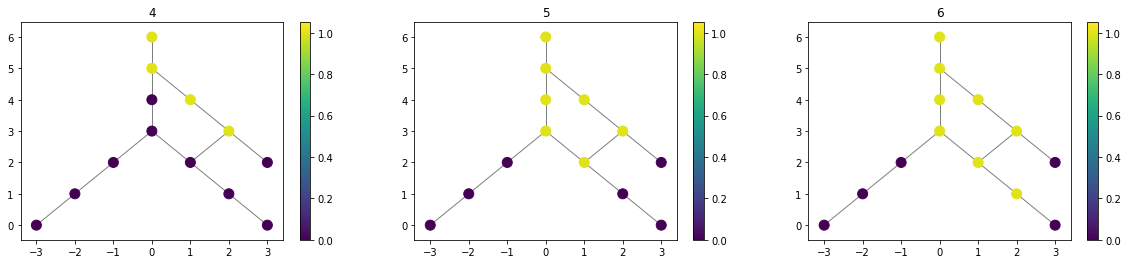

In [0]:
exp[3,0]=2 # 4,1,2
exp[3,1]=2 # 4,1,3
exp[3,2]=2 # 4,1,5
exp[3,3]=2 # 4,1,6
exp[3,4]=2 # 4,2,3
exp[3,5]=2 # 4,2,5
exp[3,6]=2 # 4,2,6
exp[3,7]=2 # 4,3,5
exp[3,8]=1 # 4,3,6 !!!
exp[3,9]=0 # 4,5,6

plot_comparacion([4,5,6])

#### Comparaciones con el gen 5

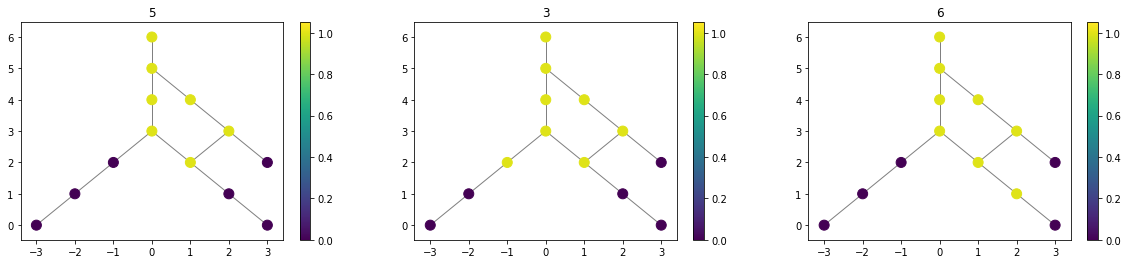

In [0]:
exp[4,0]=2 # 5,1,2
exp[4,1]=2 # 5,1,3
exp[4,2]=2 # 5,1,4
exp[4,3]=2 # 5,1,6
exp[4,4]=2 # 5,2,3
exp[4,5]=0 # 5,2,4
exp[4,6]=2 # 5,2,6
exp[4,7]=0 # 5,3,4
exp[4,8]=1 # 5,3,6 !!!
exp[4,9]=2 # 5,4,6

plot_comparacion([5,3,6])

#### Comparaciones con el gen 6

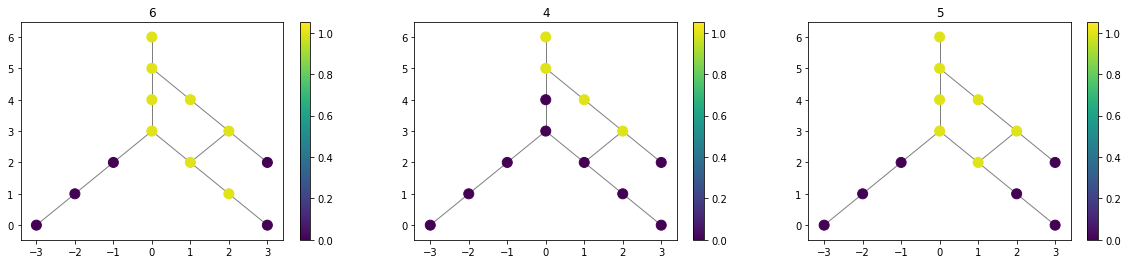

In [0]:
exp[5,0]=2 # 6,1,2
exp[5,1]=2 # 6,1,3
exp[5,2]=2 # 6,1,4
exp[5,3]=2 # 6,1,5
exp[5,4]=0 # 6,2,3
exp[5,5]=0 # 6,2,4
exp[5,6]=1 # 6,2,5
exp[5,7]=0 # 6,3,4
exp[5,8]=2 # 6,3,5
exp[5,9]=2 # 6,4,5

plot_comparacion([6,4,5])

#### Matriz de resultados esperados

In [0]:
print(exp)

[[2. 0. 2. 2. 0. 0. 0. 2. 2. 0.]
 [2. 2. 2. 2. 0. 2. 2. 2. 2. 2.]
 [2. 0. 2. 2. 0. 2. 2. 2. 2. 0.]
 [2. 2. 2. 2. 2. 2. 2. 2. 1. 0.]
 [2. 2. 2. 2. 2. 0. 2. 0. 1. 2.]
 [2. 2. 2. 2. 0. 0. 1. 0. 2. 2.]]


### Ver resultados

In [0]:
print('Resultados de la base de caminos unidos')
[comp_B1,lista_genes1]=exp_matrix(dist_B1,exp)
for i in comp_B1:
  print(i)

print(' ')
print('Resultados de la base de caminos individuales')
[comp_B2,lista_genes2]=exp_matrix(dist_B2,exp)
for i in comp_B2:
  print(i)

print(" ")
print("Lista de genes donde la comparacion dio error")
print(" ")
print("Base 1")
for i in lista_genes1:
  print(i)
print(" ")
print("Base 2")
for i in lista_genes2:
  print(i)

Resultados de la base de caminos unidos
Nro de errores:  4
['right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'WRONG', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'WRONG', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
 
Resultados de la base de caminos individuales
Nro de errores:  4
['right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['WRONG', 'right', 'right', 'right', 'right', 'right', 

### Resultados prueba:

#### Casos de error:

En las dos medidas:
* 1-2 vs 1-4: Esperaba que sea menor. Es mayor en las dos medidas de distancia.
* 4-1 vs 4-2: Esperaba que sea mayor. Es igual en la medida de base de hojas y mayor en la menor de la base completa. 
* 4-3 vs 4-6: Esperaba que sea igual. Es menor en las dos medidas.

En una medida:
* 1-4 vs 1-6: Error en la base de un vector por hoja. Esperaba que sea mayor. Es igual.
* 5-3 vs 5-6: Error en la base de todos los caminos posibles. Esperaba que sea igual. Es menor.

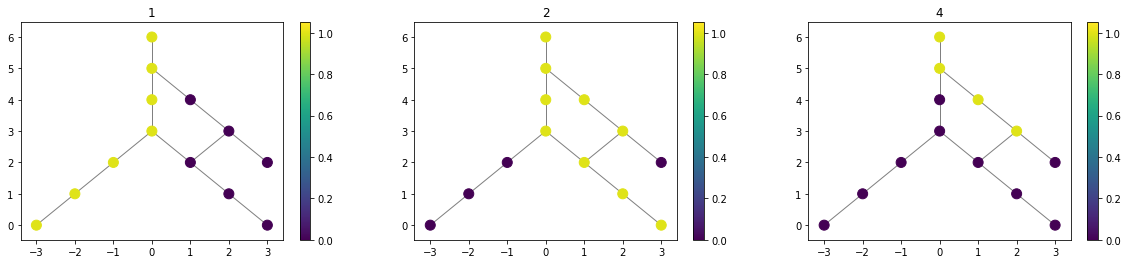

In [0]:
plot_comparacion([1,2,4])

### Laplaciano

In [0]:
# probar con la base del laplaciano (autovectores) para las cantidades de vectores dadas por la lista: (donde -1 indica todos los vectores)
nro_vec_prueba = [1,2,3,4,5,6,7,8,9,10,11,12,-1]

for k in nro_vec_prueba:
  print("cant de vectores ",k if k!=-1 else "todos")

  dist = np.zeros((6,6))
  if k == -1:
    ggf = np.dot(BL.T, genes.T).T  
  else:
    ggf = np.dot(BL[:,-k:].T, genes.T).T

  for i in range(6):
    for j in range(i,6):
      dist[i,j] = np.linalg.norm(ggf[i,:]-ggf[j,:])
  dist = dist + dist.T
  #print(dist)

  [comp,lista_genes]=exp_matrix(dist,exp)
  for i in comp:
    print(i)
  print(" ")

# hay una diferencia en usar distintas cantidades de elementos de la base
# si se muestran los vectores de distancia se puede ver que cambian en los distintos casos

# pero las relaciones entre distancias son las mismas en todos los casos
# podriamos utilizar pocos elementos de la base obteniendo los mismos resultados

cant de vectores  1
Nro de errores:  31
['WRONG', 'right', 'WRONG', 'right', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'right', 'WRONG']
['WRONG', 'WRONG', 'WRONG', 'right', 'WRONG', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'WRONG', 'right', 'right', 'right']
['WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'right', 'right', 'WRONG', 'WRONG']
['right', 'right', 'WRONG', 'right', 'WRONG', 'right', 'WRONG', 'right', 'WRONG', 'right']
['WRONG', 'WRONG', 'WRONG', 'WRONG', 'right', 'right', 'WRONG', 'WRONG', 'right', 'WRONG']
 
cant de vectores  2
Nro de errores:  34
['WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'right']
['WRONG', 'WRONG', 'right', 'right', 'WRONG', 'right', 'right', 'right', 'right', 'right']
['WRONG', 'right', 'right', 'WRONG', 'right', 'right', 'WRONG', 'right', 'right', 'right']
['WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'right', 'WRONG', 'WRONG']
['right'

In [0]:
print(lista_genes)

[[1, 2, 4], [1, 4, 6], [3, 1, 4]]


In [0]:
for i in dist:
  print(i)

[0.         2.82842712 2.23606798 2.64575131 2.44948974 2.64575131]
[2.82842712 0.         1.73205081 2.23606798 1.41421356 1.        ]
[2.23606798 1.73205081 0.         2.         1.         1.41421356]
[2.64575131 2.23606798 2.         0.         1.73205081 2.        ]
[2.44948974 1.41421356 1.         1.73205081 0.         1.        ]
[2.64575131 1.         1.41421356 2.         1.         0.        ]


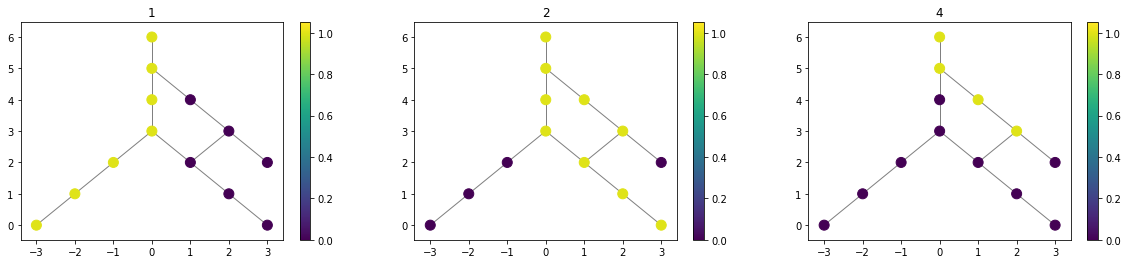

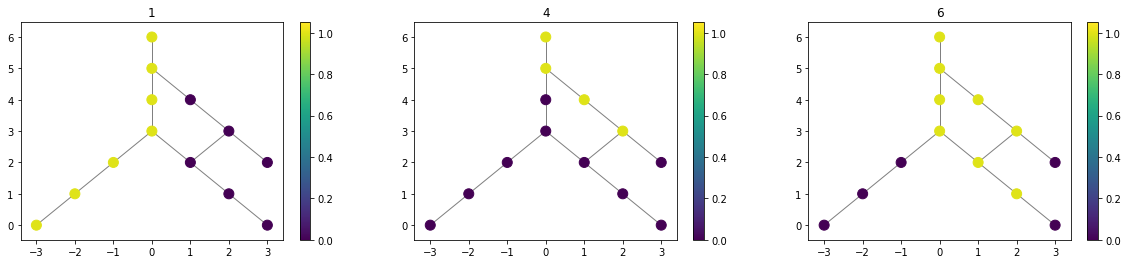

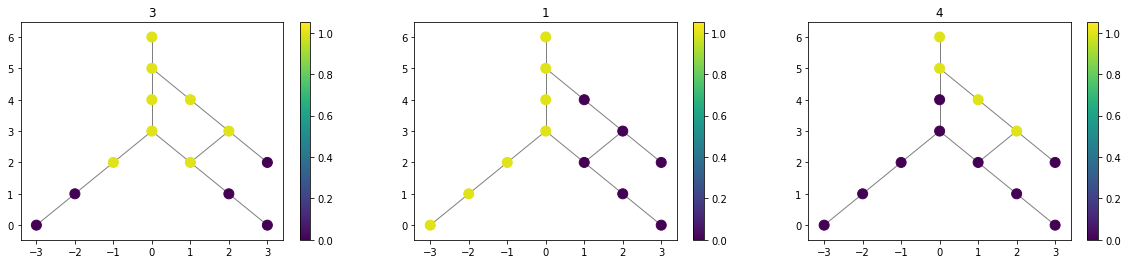

In [0]:
plot_comparacion([1,2,4]) # Esperaba que sea menor, pero es mayor
plot_comparacion([1,4,6]) # Esperaba que sea mayor, pero es igual (en todos los casos anteriores)
plot_comparacion([3,1,4]) # Esperaba que sea menor, pero es mayor

## QR

In [0]:
dist_qr1 = dist_qr2 = np.zeros((6,6))
dist_qr2 = dist_qr2 = np.zeros((6,6))

ggfqr1 = np.dot(BQR1.T, genes.T).T 
ggfqr2 = np.dot(BQR2.T, genes.T).T

for i in range(6):
  for j in range(i,6):
    dist_qr1[i,j] = np.linalg.norm(ggfqr1[i,:]-ggfqr1[j,:])
    dist_qr2[i,j] = np.linalg.norm(ggfqr2[i,:]-ggfqr2[j,:])
dist_qr1 = dist_qr1 + dist_qr1.T
dist_qr2 = dist_qr2 + dist_qr2.T

[comp,lista_genes_1]=exp_matrix(dist_qr1,exp)
for i in comp:
  print(i)
print(" ")

[comp,lista_genes_2]=exp_matrix(dist_qr2,exp)
for i in comp:
  print(i)

Nro de errores:  3
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
 
Nro de errores:  9
['right', 'WRONG', 'right', 'right', 'WRONG', 'right', 'right', 'WRONG', 'WRONG', 'right']
['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right']
['WRONG', 'WRONG', 'WRONG', 'WRONG', 'right', 'right', 'right', 'right', 'right', 'right']
['right', 'right', 'right', 'right', 'right', 'rig

In [0]:
print(lista_genes_1)

[[2, 1, 4], [5, 1, 4], [6, 1, 4]]


In [0]:
print(dist_qr1)

[[0.         2.82842712 2.23606798 3.87298335 2.44948974 2.64575131]
 [2.82842712 0.         1.73205081 3.60555128 1.41421356 1.        ]
 [2.23606798 1.73205081 0.         3.46410162 1.         1.41421356]
 [3.87298335 3.60555128 3.46410162 0.         3.31662479 3.46410162]
 [2.44948974 1.41421356 1.         3.31662479 0.         1.        ]
 [2.64575131 1.         1.41421356 3.46410162 1.         0.        ]]


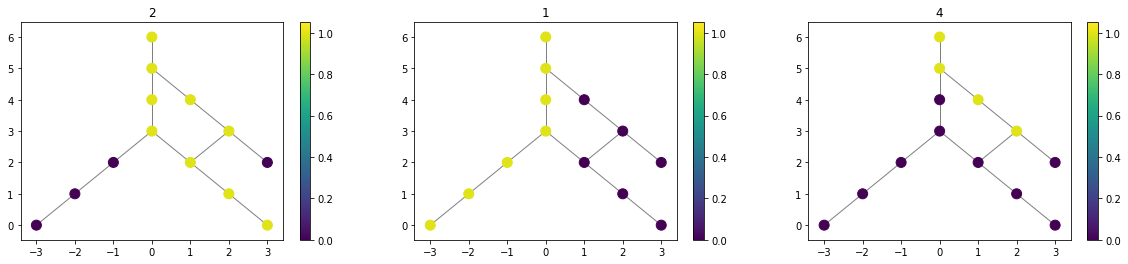

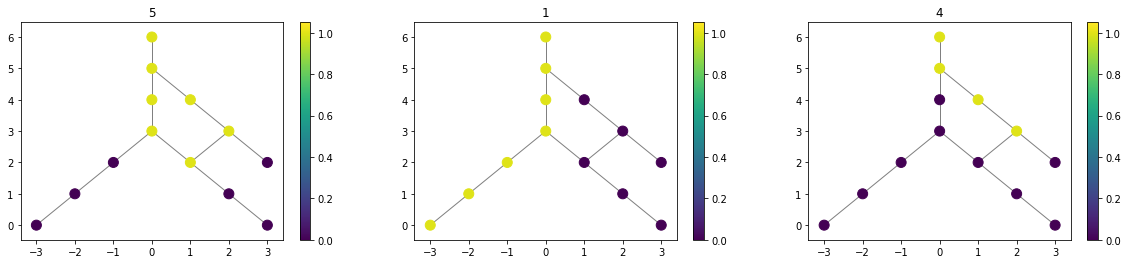

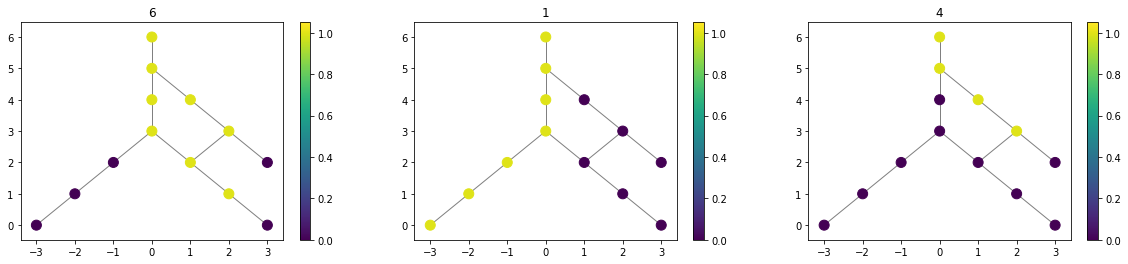

In [0]:
plot_comparacion([2,1,4]) # Esperaba que sea mayor, pero es menor
plot_comparacion([5,1,4]) # Esperaba que sea mayor, pero es menor
plot_comparacion([6,1,4]) # Esperaba que sea mayor, pero es menor